In [1]:
import numpy as np
import pandas as pd

In [2]:
follower_tabq = np.load('plot_data/follower_tabq.npy')
leader_tabq = np.load('plot_data/leader_tabq.npy')
follower_ppo = pd.read_csv('plot_data/follower_ppo.csv')
leader_ppo = pd.read_csv('plot_data/leader_ppo.csv')
follower_rnn = pd.read_csv('plot_data/follower_rnn.csv')
leader_rnn = pd.read_csv('plot_data/leader_rnn.csv')

In [3]:
follower_rnn.head()

,Step,celestial-elevator-24 - mean evaluation reward,celestial-elevator-24 - mean evaluation reward__MIN,celestial-elevator-24 - mean evaluation reward__MAX
0,0,5.0,5.0,5.0
1,1,5.0,5.0,5.0
2,2,5.0,5.0,5.0
3,3,5.0,5.0,5.0
4,4,5.0,5.0,5.0


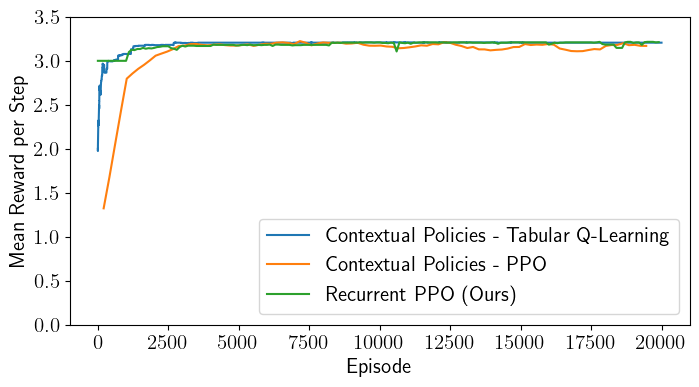

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# make text size of all labels larger
plt.rcParams.update({'font.size': 15})

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(20000), follower_tabq[:20000], label='Contextual Policies - Tabular Q-Learning')
plt.plot((follower_ppo["Step"] / 10).to_numpy()[:-3], np.convolve((follower_ppo["Value"] / 10 + 2.5).to_numpy(), np.ones(8)/8, mode='same')[:-3], label='Contextual Policies - PPO')
plt.plot((follower_rnn["Step"]  * 100).to_numpy(), (follower_rnn["celestial-elevator-24 - mean evaluation reward"] / 10 + 2.5).to_numpy(), label='Recurrent PPO (Ours)')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Mean Reward per Step')
#plt.title('Follower Mean Reward')
plt.legend()

# put legend bottom right
plt.legend(loc='lower right')

# ylim
plt.ylim(0, 3.5)

# Display the plot
plt.show()


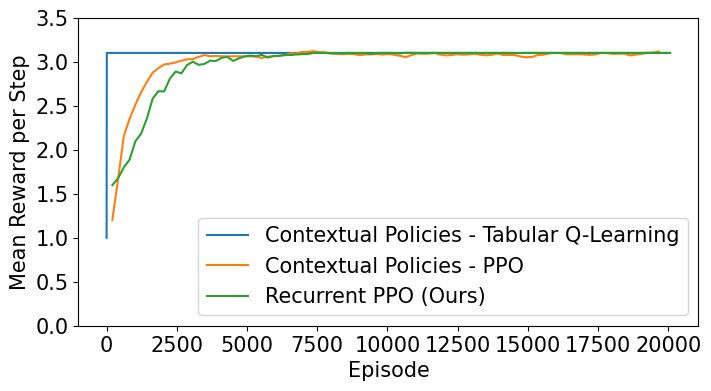

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# make text size of all labels larger
plt.rcParams.update({'font.size': 15})

# make font to latex style
#plt.rc('text', usetex=True)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(np.arange(20000), np.concatenate((leader_tabq, np.full(19000, 3.1))), label='Contextual Policies - Tabular Q-Learning')
plt.plot((leader_ppo["Step"] / 10).to_numpy()[:-2], np.convolve((leader_ppo["Value"] / 10 + 2.5).to_numpy(),np.ones(5)/5, mode='same')[:-2], label='Contextual Policies - PPO')
plt.plot((leader_rnn["Step"]  / 10).to_numpy(), (leader_rnn["Value"] / 10 + 2.5).to_numpy(), label='Recurrent PPO (Ours)')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Mean Reward per Step')
#plt.title('Leader Mean Reward')
plt.legend()

# ylim
plt.ylim(0, 3.5)

# put legend bottom right
plt.legend(loc='lower right')

# Display the plot
plt.show()
